# Animal Ai

## 1. Setup and load data

### 1.1 Install dependencies and setup

In [2]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip list

Package                      Version
---------------------------- ----------------
absl-py                      1.4.0
accelerate                   0.22.0
aggdraw                      1.3.18
aiofiles                     23.2.1
aiohttp                      3.8.5
aiosignal                    1.3.1
altair                       5.0.1
annotated-types              0.5.0
antlr4-python3-runtime       4.9.3
anyio                        3.7.1
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.5.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.1.0
audioread                    3.0.1
av                           11.0.0
Babel                        2.13.1
backoff                      2.2.1
bcc                          0.18.0
beautifulsoup4               4.12.2
bleach                       6.1

In [1]:
import tensorflow as tf
import os

2024-05-23 17:02:32.470734: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-23 17:02:32.527675: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-23 17:02:32.733817: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 17:02:32.733878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 17:02:32.772607: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
for folder in os.listdir('animals/animals'):
    print(folder, len(os.listdir(os.path.join('animals/animals', folder))))

dog 60
kangaroo 60
squid 60
cockroach 60
crow 60
gorilla 60
reindeer 60
butterfly 60
horse 60
swan 60
parrot 60
snake 60
caterpillar 60
okapi 60
boar 60
shark 60
squirrel 60
seahorse 60
fox 60
zebra 60
rat 60
hyena 60
whale 60
woodpecker 60
lobster 60
hippopotamus 60
hornbill 60
goose 60
antelope 60
beetle 60
pig 60
turkey 60
bear 60
dragonfly 60
raccoon 60
goldfish 60
porcupine 60
possum 60
deer 60
panda 60
cat 60
ox 60
rhinoceros 60
wolf 60
sheep 60
octopus 60
koala 60
wombat 60
fly 60
grasshopper 60
orangutan 60
lion 60
hedgehog 60
bison 60
eagle 60
coyote 60
oyster 60
elephant 60
moth 60
tiger 60
hare 60
dolphin 60
sandpiper 60
seal 60
pelecaniformes 60
turtle 60
sparrow 60
lizard 60
goat 60
pigeon 60
donkey 60
cow 60
jellyfish 60
otter 60
ladybugs 60
hamster 60
flamingo 60
leopard 60
owl 60
mosquito 60
hummingbird 60
badger 60
mouse 60
starfish 60
chimpanzee 60
duck 60
crab 60
bee 60
penguin 60
bat 60


### 1.2 Load Data

In [4]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [73]:
from matplotlib import pyplot as plt
import numpy as np

In [74]:
data = tf.keras.utils.image_dataset_from_directory('animals/animals')

Found 5400 files belonging to 90 classes.


In [75]:
data_iterator = data.as_numpy_iterator()

In [76]:
batch = data_iterator.next()

In [77]:
#Image represented as numpy array
batch[0]

array([[[[4.71054688e+01, 5.91054688e+01, 4.71054688e+01],
         [4.83164062e+01, 6.03164062e+01, 4.83164062e+01],
         [4.95273438e+01, 6.15273438e+01, 4.95273438e+01],
         ...,
         [9.80000000e+01, 6.80000000e+01, 4.00000000e+01],
         [9.80000000e+01, 6.80000000e+01, 4.00000000e+01],
         [9.71054688e+01, 6.71054688e+01, 3.91054688e+01]],

        [[4.71054688e+01, 5.91054688e+01, 4.71054688e+01],
         [4.83164062e+01, 6.03164062e+01, 4.83164062e+01],
         [4.97673264e+01, 6.17673264e+01, 4.97673264e+01],
         ...,
         [9.80000000e+01, 6.80000000e+01, 4.00000000e+01],
         [9.80000000e+01, 6.80000000e+01, 4.00000000e+01],
         [9.75125504e+01, 6.75125504e+01, 3.95125504e+01]],

        [[4.70136719e+01, 5.90136719e+01, 4.70136719e+01],
         [4.82536545e+01, 6.02536545e+01, 4.82536545e+01],
         [5.00546875e+01, 6.20546875e+01, 5.00546875e+01],
         ...,
         [9.80484085e+01, 6.80484085e+01, 4.00484085e+01],
         [

In [78]:
#Image label
batch[1]

array([35, 26, 52,  1, 74, 55, 46, 46, 20,  7, 82, 53, 55, 48, 55, 79, 15,
       10,  9, 22, 77, 82, 32, 22, 60, 51, 11, 80, 64, 24, 11, 56],
      dtype=int32)

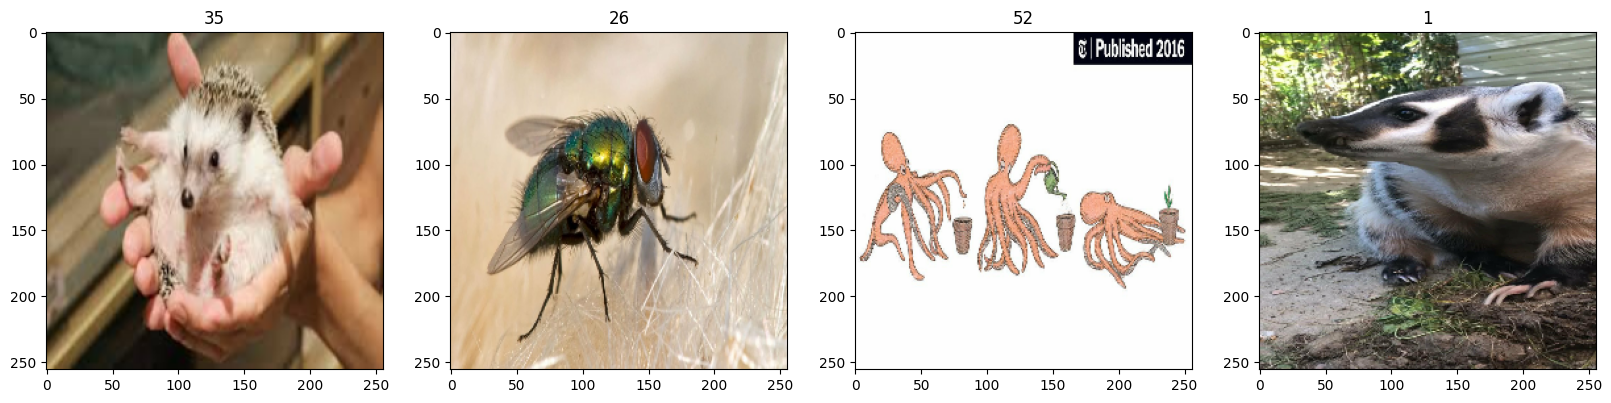

In [79]:
#Example of images
#Each batch label (title) represent a different class of animal(0 cat, 1 dog)
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## 2. Preprocess data

### 2.1 Scale data

In [80]:
#x represent images and y labels
data = data.map(lambda x,y: (x/255, y))

In [81]:
scaled_iterator = data.as_numpy_iterator()
scaled_batch = scaled_iterator.next()

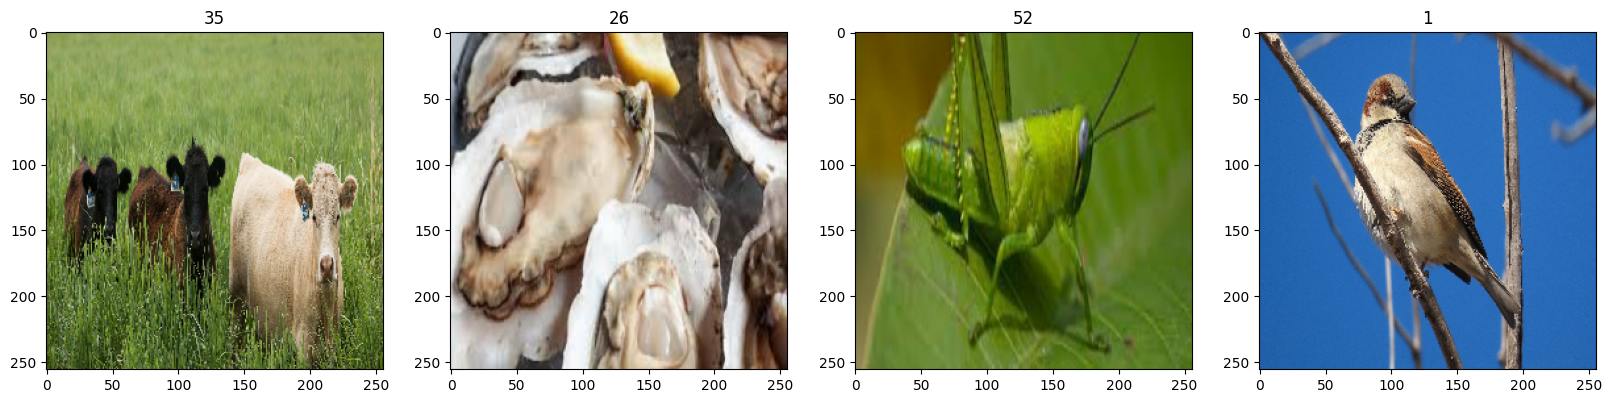

In [82]:
fig, ax = plt.subplots(ncols = 4, figsize = (20, 20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

### 2.2 Split data

In [83]:
#Number of batch for train, test and evaluation
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [84]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

## 3. Deep Model

### 3.1 Build Deep Learning Model

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [96]:
model = Sequential()

In [97]:
#Convolutional block with 16 filter, filter size 3x3pixel, move 1 pixel each time
#activation='relu' convert all negatives output values in 0
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
#Single output, it's the label of the class(Dog, Cat...)
#model.add(Dense(100, activation='linear'))
model.add(Dense(90, activation='softmax'))

In [98]:
#using the adam optimizer
model.compile('adam', loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 127, 127, 32)      0         
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 62, 62, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 62, 62, 32)       

### 3.2 Train

In [100]:
logdir='logs'

In [101]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [68]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/5
118/118 [==============================] - 69s 575ms/step - loss: 16.8080 - accuracy: 0.0109 - val_loss: 16.7733 - val_accuracy: 0.0110
Epoch 2/5
118/118 [==============================] - 65s 539ms/step - loss: 16.8435 - accuracy: 0.0111 - val_loss: 16.7307 - val_accuracy: 0.0083
Epoch 3/5
118/118 [==============================] - ETA: 0s - loss: 16.8773 - accuracy: 0.0117

2024-05-23 17:21:42.195583: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 25165952 bytes after encountering the first element of size 25165952 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


KeyboardInterrupt: 

### 3.3 Plot Performance

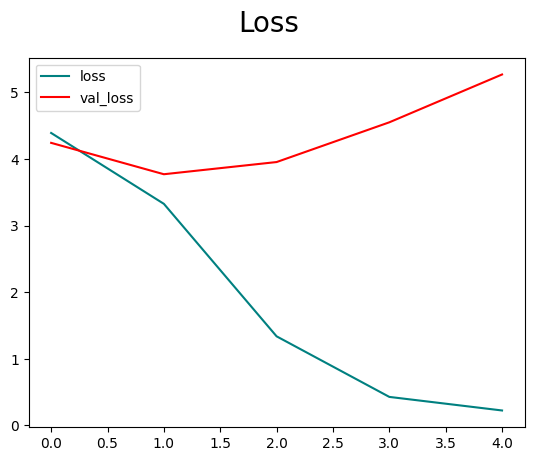

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

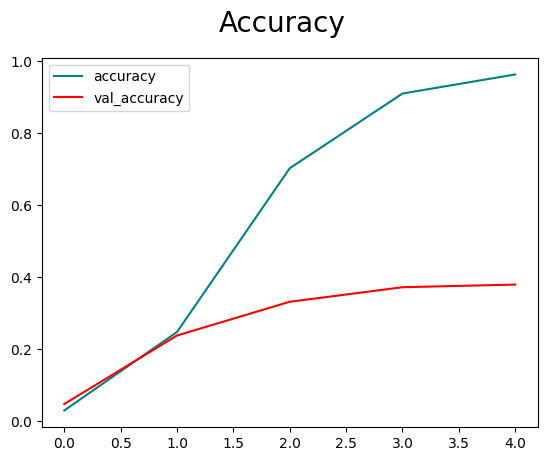

In [44]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='red', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## 4. Evaluating performance

### 4.1 Evaluate

In [45]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy 

In [46]:
pre = Precision()
re = Recall()
#ba = BinaryAccuracy()

In [47]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    #ba.update_state(y, yhat)

1/1 [==============================] - 0s 302ms/step


ValueError: Shapes (32, 90) and (32,) are incompatible

In [67]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}')

Precision: 0.8235294222831726, Recall: 0.875, Binary Accuracy: 0.8611111044883728


### 4.2 Testing

In [51]:
import cv2

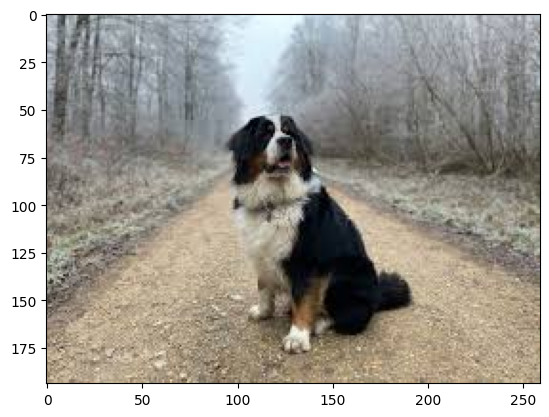

In [53]:
img = cv2.imread('animals/test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

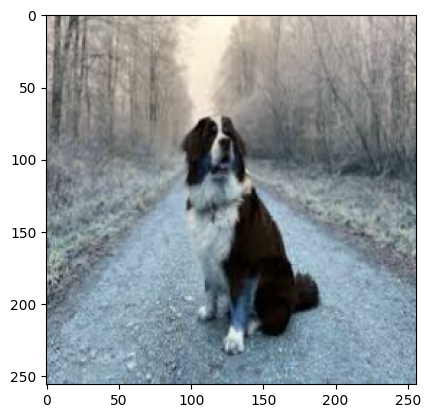

In [54]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 86ms/step


In [56]:
yhat

array([[1.67123943e-07, 4.32087341e-03, 1.10296023e-04, 2.83514680e-07,
        9.53863142e-04, 3.61512939e-04, 2.07792425e-07, 1.51042434e-06,
        5.79615835e-06, 1.79953404e-05, 5.40983025e-03, 7.63991522e-07,
        4.11194804e-07, 7.59038642e-07, 8.68991901e-06, 2.10441215e-07,
        5.97776307e-07, 1.16352692e-06, 4.08676824e-05, 1.12738753e-05,
        4.95899144e-09, 2.01539578e-07, 1.46222277e-07, 5.43994502e-05,
        1.95099332e-04, 3.33427885e-09, 2.36750984e-05, 2.21502502e-03,
        1.83677551e-09, 5.39701561e-10, 3.77220772e-06, 1.18412918e-05,
        1.15596990e-07, 1.21214714e-06, 2.13206796e-12, 7.08861035e-06,
        1.44642877e-06, 2.70230812e-04, 3.52326883e-11, 9.27179456e-01,
        1.98105283e-07, 1.56326155e-06, 4.90889818e-07, 1.06087734e-08,
        3.17982597e-07, 6.46746116e-07, 1.95565963e-06, 7.64433636e-08,
        2.48361835e-06, 8.40375936e-10, 4.44996203e-07, 8.24559550e-08,
        1.26996497e-03, 1.42722556e-07, 3.91718004e-07, 8.844473

In [60]:
tf.keras.utils.image_dataset_from_directory('animals/animals').class_names[np.argmax(yhat)]

Found 5400 files belonging to 90 classes.


'hummingbird'

In [87]:
if yhat > 0.5:
    print('Predicted: Dog')
else:
    print('Predicted: Cat')

Predicted: Cat


## 5. Save the model

In [90]:
from tensorflow.keras.models import load_model

In [91]:
model.save(os.path.join('models', 'catordogclassifier.h5'))

/home/ale/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model(os.path.join('models', 'catordogclassifier.h5'))